# Phase 1: Loading Data & Pre-process MRI Images

**Name: Shreya Das**

In this phase we are going to load the image dataset from Kaggle. You can find the dataset here: https://www.kaggle.com/datasets/mhantor/mri-based-brain-tumor-images. This dataset contains MRI images of normal and tumored brains. Our goal is to create a MRI Image Analyzer using a CNN (Convolutional Neural Network) that can classify these images into 2 different classes. 

## 0 Creating a virtual environment
We are going to use a virtual environment to install all the dependencies required for this project.

In [7]:
# Creates a new virtual environment called env
#!python -m venv env

In [8]:
# We are going to activate the virtual environment for the project
#!source env/bin/activate

Our virtual environment should be up an running. You can check this in terminal. You should see (env) in the command line now.

## 1.1 Installing Dependencies and Setup
We install tensorflow and tensorflow-gpu to use keras API to sort the images into the 2 classes. open-cv is going to allow to remove images that are dodgy and then matplotlib is going to allow us to visualize the images.

In [9]:
# Install tensorflow into the python virtual environment
#!pip install tensorflow 

In [10]:
#!pip install opencv-python matplotlib

In [11]:
import tensorflow as tf
import os

## 1.2 Removing dodgy images
Note that when we are training our model, we need to make sure that the images that we use are compatible with python.

You can take a look at the images in this dataset, but what we see is that all the images in this dataset have extension .jpg, which is compatible with python. Thus, we don't really have to perform dodgy image removal. I would only suggest this step if you are getting images from the internet and not using a dataset provided to you.

We are going to do a small test using cv2. We want to use this library to view an image from one of the folders. In order to this we need to install the opencv library into the virtual environment; this library contains cv2.

In [12]:
# Install opencv library using terminal
#!pip instal opencv-python

In [13]:
import cv2

In [14]:
img = cv2.imread(os.path.join('data', 'Train', 'Normal', 'Normal (2).jpg'))

In [15]:
img.shape

(256, 256, 3)

This information tells us that it is 256 pixels tall by 256 pixels wide. 3 tells us that this is a colored image.

We are going to now show the image here in the notebook, using matplotlib and cv2.

In [16]:
import matplotlib.pyplot as plt

.cvtColor is a method that allows us to color from BGR to RGB. If we didn't use this method then, the color on the image would look a little weird.

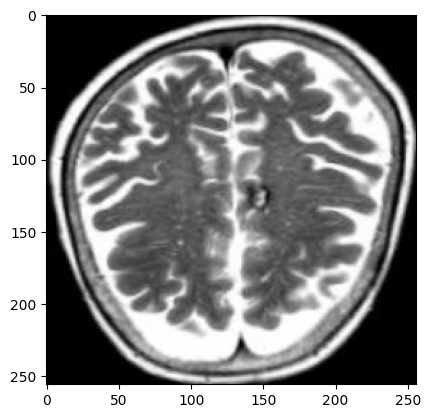

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 1.3 Load Data
In our dataset, we have our data already split into training, validation and testing data. Each of these splits has the corresponding diagnosis of 'Normal' or 'Tumor'. Here we will load them into different data pipelines. Note, if you download the dataset from Kaggle directly then you may need to move and rename some folders to get replicate the code here. In order to avoid confusion, download the data folder ('data.zip') from the coressponding Github repo: https://github.com/Shreya-Das-uoft/MRI-Image-Classifier. 

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
# Training data 
data_train = tf.keras.utils.image_dataset_from_directory(os.path.join('data', 'Train'))

Found 320 files belonging to 2 classes.


You can check if the data was imported correctly by counting the number of files in the Train folder. There are 136 files labelled 'Normal' and 184 files labelled 'Tumor'. This confirms that the 'Train' folder was imported correctly.

In [20]:
# Validation data
data_validation = tf.keras.utils.image_dataset_from_directory(os.path.join('data', 'Validation'))

Found 80 files belonging to 2 classes.


In [21]:
# Testing data
data_test = tf.keras.utils.image_dataset_from_directory(os.path.join('data', 'Testing'))

Found 400 files belonging to 2 classes.


In order to loop through the data pipeline that we have imported here, we can use a numpy iterator. The numpy iterator allows us to iterate over different batches of the data pipeline.

We will only do this for the training data pipeline, since we don't need to iterate over the entire data pipeline for the rest of this project.

In [22]:
# Creating the numpy iterator from the train data pipeline
data_iterator_train = data_train.as_numpy_iterator()

In [23]:
# Getting a batch from the train data pipeline
batch = data_iterator_train.next()

In [24]:
batch[0].shape

(32, 256, 256, 3)

32 represents the number of images in this batch. (256, 256) represents the size of the image. 3 represents that these images are colored.

In [25]:
batch[1]

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int32)

The series of 1s and 0s represents the different classes that the images are classified under; so 'Normal' or 'Tumor'. In order to figure which number represents which class, we are going to display the figure with the label.

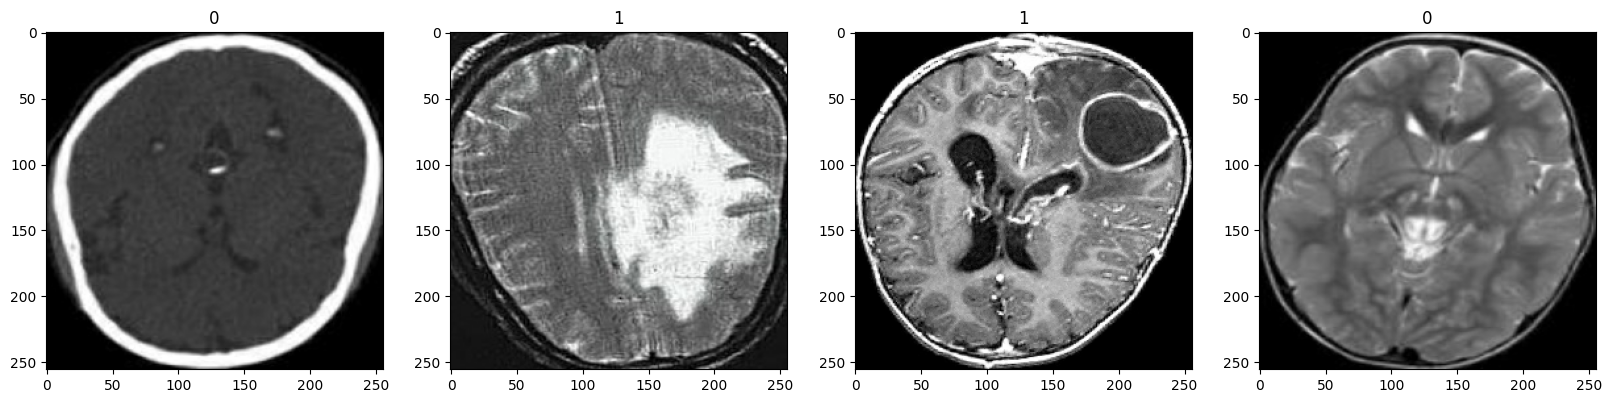

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

We see that here 0 represents 'Normal' and 1 represents 'Tumor'.

## 2 Data pre-processing
When we are working with image data, we need to scale the images between ranges of 0 and 1 for several reasons including preventing exploding or vanishing gradients during model training, bias towards larger values, and ensuring consistency over datasets.

### 2.1 Scaling
Here, we need to scale our data from 0-255 to 0-1. We can do this by dividing by 255 in order to get the scaled data. Now we want to make sure that as we are loading data into the data pipeline, that this scaling process (transformation) is occuring too. We can do this using a keras method called tf.map().

In [27]:
# Training data
data_train = data_train.map(lambda x, y: (x/255, y))

# Validation data
data_validation = data_validation.map(lambda x, y: (x/255, y))

# Testing data
data_test = data_test.map(lambda x, y: (x/255, y))

Now we are going to check if the data was transformed using the numpy iterator method.

In [28]:
# Creating the numpy iterator from the train data pipeline
data_iterator_valid = data_validation.as_numpy_iterator()

In [29]:
# Getting a batch from the train data pipeline
batch = data_iterator_valid.next()

In [30]:
batch[0].max()

np.float32(1.0)

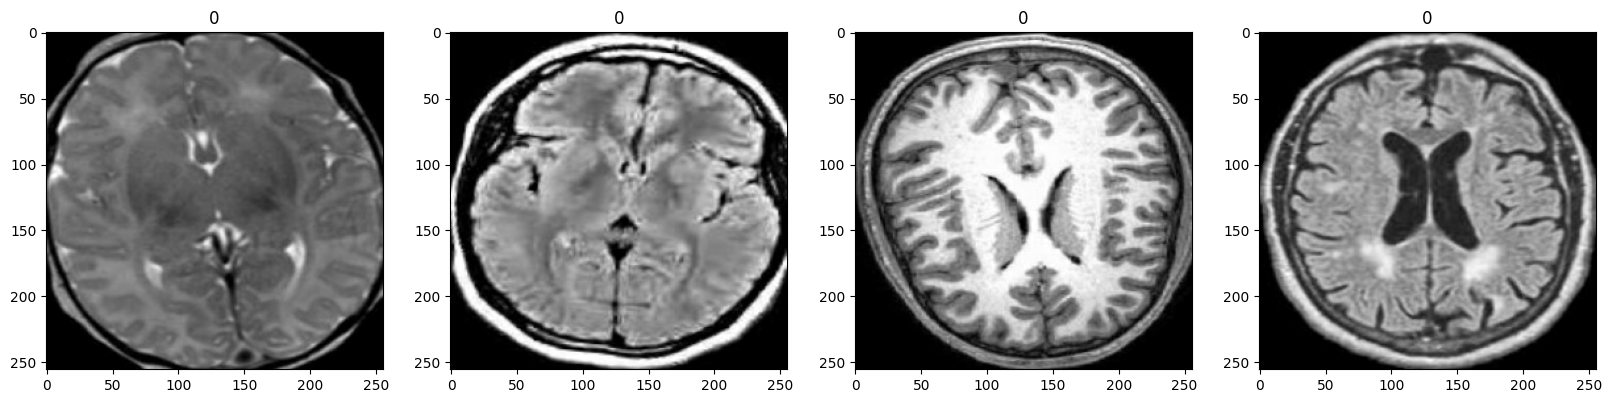

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data
As mentioned before, this dataset has already been split into training. validation and testing data. However, when we look at the ratio of the data splits we see that 40% of the data is training, 10% is validation, and 50% is testing data. This is not the recommended data splits, rather we should have 60-80% training data, 10-20% validation and 10-20% test data. Thus, we will need to do some manipulation to get these splits. We will aim for 70:20:10 for our data split.

In [32]:
# Concatenate the MapDatasets first
ds = data_train.concatenate(data_validation)

In [33]:
data = ds.concatenate(data_test)

In [34]:
len(data)

26

We have 26 batches in our entire dataset. We need to make sure that the number of batches for training, validation, and testing all add up to 26 batches.

In [35]:
# Then we split the data into training, validation, and testing data
train_size = int(len(data)*0.7) # 70% training
val_size = int(len(data)*0.2) # 20% validation
test_size = int(len(data)*0.1) + 1 # 10% testing

In [36]:
train_size + val_size + test_size

26

Here, we add 1 to the test_size to ensure that we have 3 batches allocated to the test data since 26 * 0.1 = 2.6 (the int function would round this down to 2).

Next, we need to actually split the data using these data batch sizes.

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Phase 2: Building Deep Learning Model
Using the split dataset, we are going to now build our model. We are going to build our model using Sequential API, meaning that we will specify each layer of the model and add it layer by layer to the base layer. 

**Conv2D** is an important layer for Deep Learning Image analyzer bc it can extract features such as edges, textures, shapes from the images using filters/kernels.

**MaxPooling2D** is a type of downsampling layer used in CNNs to reduce the size (width and height) of feature maps, while still retaining the most important information.

**Dense** is a type of layer where every neuron in the current layer is connected to every neuron in the previous layer. It is also known as a fully connected neural network.

**Flatten** is a layer than will turn the 3D data from the images into a 1D vector. It's important to do this because 1D vectors are what the Dense layers expect.

**Dropout** is a layer than will drop some of the connection from the previous layer to the last layer of the CNN. It is random and it is important because it prevents overfitting.

In [38]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
# Import the Sequential model library
from tensorflow.keras.models import Sequential

# Import layers for the Sequential model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [41]:
# This is adding the Conv2D layer to extract edges, shapes, textures
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
# Reduce the size of the feature maps with Maxpooling layer
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Final layer that will make a binary decision of 0 or 1 (sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

/Users/dasmaster/BioinformaticsLab/MRI Image Classifier/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Next, we are going to compile all the layers of the model. Here 'adam' represents an optimizer. We are also going to store the loss in accuracy of the model as we are compiling.

In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 1.1 Train our Model
We are going to create a log directory using tensorboard callbacks. This allows us to log the model's training process as it's training. This allows for easier debugging and model adjustments.

In [44]:
logdir = 'logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Here, we are going to train the model using the 'train' dataset with 20 runs (epochs) of the entire data. Also, we are using the validation data ('val') to make any adjustments of the model as it is training. The last parameter is going to display the each epoach of the model into a Tensorboard log.

In [46]:
hist = model.fit(train, epochs = 20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4831 - loss: 1.0051 - val_accuracy: 0.5500 - val_loss: 0.6569
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6738 - loss: 0.6173 - val_accuracy: 0.8062 - val_loss: 0.5109
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7743 - loss: 0.4854 - val_accuracy: 0.8562 - val_loss: 0.3198
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8970 - loss: 0.2641 - val_accuracy: 0.8625 - val_loss: 0.2852
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9198 - loss: 0.1752 - val_accuracy: 0.9812 - val_loss: 0.0898
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9917 - loss: 0.0516 - val_accuracy: 1.0000 - val_loss: 0.0270
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 648ms/step - accuracy: 0.9994 - loss: 0.0261 - val_accuracy: 0.9875 - val_loss: 0.0503
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 588ms/step - accuracy: 0.9950 - loss: 0.0298 - val_accuracy: 1.0000 - val

In [47]:
hist.history

{'accuracy': [0.5267857313156128,
  0.7071428298950195,
  0.824999988079071,
  0.8892857432365417,
  0.9482142925262451,
  0.9892857074737549,
  0.9982143044471741,
  0.9964285492897034,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.8185473680496216,
  0.5907303690910339,
  0.4184645712375641,
  0.26044973731040955,
  0.13510970771312714,
  0.051881320774555206,
  0.029519084841012955,
  0.02319137193262577,
  0.006592303980141878,
  0.004536116030067205,
  0.0016270726919174194,
  0.0007605620194226503,
  0.0004945620894432068,
  0.000446595047833398,
  0.0003962298505939543,
  0.0003218152851331979,
  0.00028231568285264075,
  0.0002654772833921015,
  0.0002482140844222158,
  0.00023644867178518325],
 'val_accuracy': [0.550000011920929,
  0.8062499761581421,
  0.856249988079071,
  0.862500011920929,
  0.981249988079071,
  1.0,
  0.987500011920929,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1

We see that the accuracy of the model increases over the epochs (reaches 1) and the accuracy loss decreases over time. Similarly for the validation data, we see that the accuracy increases overtime and the accuracy loss decreases over time. 

This is what we want happening and expect to happen. If this has not happened, you need to check your model.

## 1.2 Ploting Model Performance
To really visually show the change of model performance over the epochs, we will plot the accuracy/loss of the training and validation data. 

In [52]:
import matplotlib.pyplot as plt

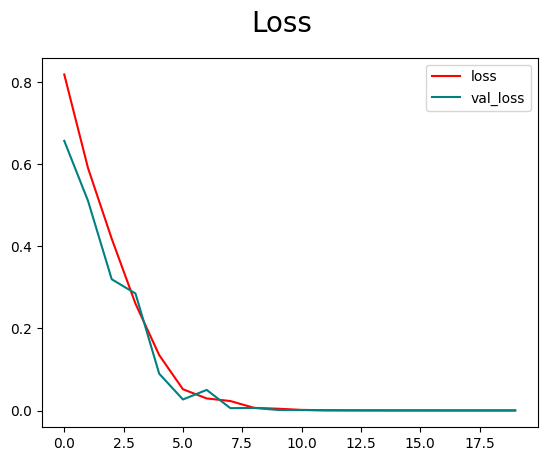

<Figure size 640x480 with 0 Axes>

In [55]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'red', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'teal', label = 'val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ="upper right")
plt.show()

plt.savefig('Loss Performance')

We see that after about 

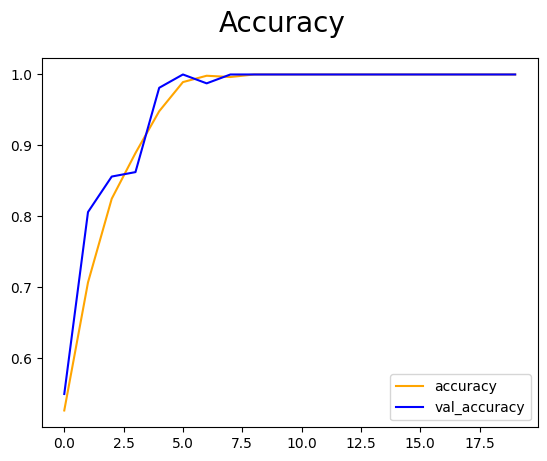

<Figure size 640x480 with 0 Axes>

In [58]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'orange', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize =20)
plt.legend(loc ="lower right")
plt.show()

plt.savefig('Accuracy Performance')